In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pylab as pl
import cv2
import matplotlib.cm as cm
import itertools
import numpy as np
import theano.tensor as T
np.random.seed(1337) # for reproducibility
from keras.models import Sequential
import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
from tqdm import tqdm
import os

In [0]:
path = '/content/drive/My Drive/CamVid'
data_shape = 360*480

In [0]:
os.chdir('/content/drive/My Drive/CamVid/')

In [0]:
def normalized(rgb):
    #return rgb/255.0
    norm=np.zeros((360,480,3),np.float32)

    b=rgb[:,:,0]
    g=rgb[:,:,1]
    r=rgb[:,:,2]

    norm[:,:,0]=cv2.equalizeHist(b)
    norm[:,:,1]=cv2.equalizeHist(g)
    norm[:,:,2]=cv2.equalizeHist(r)

    return norm

def binarylab(labels):
    x = np.zeros([360,480,12])    
    for i in range(360):
        for j in range(480):
            x[i,j,labels[i][j]]=1
    return x

In [0]:
train_data = []
from os import listdir
for filename in tqdm(os.listdir('/content/drive/My Drive/CamVid/train/')):
    train_data.append(np.rollaxis(normalized(cv2.imread('/content/drive/My Drive/CamVid/train/'+filename)),2))
train_data = np.asarray(train_data)

NameError: ignored

In [0]:
train_label = []
from os import listdir
for filename in tqdm(os.listdir('/content/drive/My Drive/CamVid/trainannot/')):
    train_label.append(binarylab(cv2.imread('/content/drive/My Drive/CamVid/trainannot/'+filename))) 


100%|██████████| 367/367 [02:22<00:00,  2.51it/s]


In [0]:
train_label = []
from os import listdir
for filename in tqdm(os.listdir('/content/drive/My Drive/CamVid/trainannot/')):
    train_label.append(cv2.imread('/content/drive/My Drive/CamVid/trainannot/'+filename))


100%|██████████| 367/367 [00:01<00:00, 263.60it/s]

In [0]:
train_label = np.reshape(train_label,(367,data_shape,12))

ValueError: ignored

In [0]:
print(train_label.shape)

AttributeError: ignored

In [0]:
train_data = np.reshape(train_data,(367,360,480,3))
train_data = np.asarray(train_data)
train_label = np.asarray(train_label)

In [0]:
kernel = 3
filter_size = 64
pad = 1
pool_size = 2

In [0]:
model = models.Sequential()
model.add(ZeroPadding2D(padding=(pad,pad) ,input_shape =(360,480,3)))
model.add(Conv2D(filter_size, kernel, kernel, border_mode='valid', activation='relu' ))
model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(128, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(256, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(512, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(512, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())

model.add(UpSampling2D(size=(pool_size,pool_size)))
model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(256, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())

model.add(UpSampling2D(size=(pool_size,pool_size)))
model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(128, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())

model.add(UpSampling2D(size=(pool_size,pool_size)))
model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(filter_size, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())



model.add(Layer(input_shape=(360, 480,3)))



model.add(Conv2D(12, 1, 1, border_mode='valid'))
model.add(Reshape((12,data_shape)))
model.add(Permute((2, 1)))
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="valid")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="valid")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="valid")`
/usr/local/lib/py

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_242 (ZeroPadd (None, 362, 482, 3)       0         
_________________________________________________________________
conv2d_256 (Conv2D)          (None, 360, 480, 64)      1792      
_________________________________________________________________
zero_padding2d_243 (ZeroPadd (None, 362, 482, 64)      0         
_________________________________________________________________
batch_normalization_229 (Bat (None, 362, 482, 64)      256       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 181, 241, 64)      0         
_________________________________________________________________
zero_padding2d_244 (ZeroPadd (None, 183, 243, 64)      0         
_________________________________________________________________
conv2d_257 (Conv2D)          (None, 181, 241, 128)   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), padding="valid")`


In [0]:
nb_epoch = 20
batch_size = 10

In [0]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, train_label,batch_size=batch_size,nb_epoch=nb_epoch)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


ValueError: ignored

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road_marking = [255,69,0]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

label_colours = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])

In [0]:
def visualize(temp, plot=True):
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0,11):
        r[temp==l]=label_colours[l,0]
        g[temp==l]=label_colours[l,1]
        b[temp==l]=label_colours[l,2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:,:,0] = (r/255.0)#[:,:,0]
    rgb[:,:,1] = (g/255.0)#[:,:,1]
    rgb[:,:,2] = (b/255.0)#[:,:,2]
    if plot:
        plt.imshow(rgb)
    else:
        return rgb

In [0]:
gt = cv2.imread('/content/drive/My Drive/CamVid/test/0001TP_008550.png')

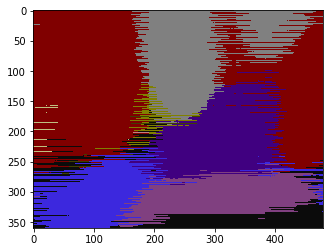

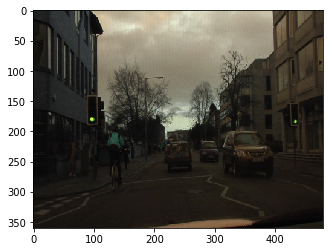

In [0]:
output = model.predict_proba(train_data)
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)
plt.figure(2)
plt.imshow(gt)

In [0]:
train = np.asarray(train_label)

In [0]:
train.shape

(367, 360, 480, 3)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import numpy as np
import keras
import os
from tqdm import tqdm
from os import listdir
from tensorflow.keras.layers import Input
from keras.models import Sequential
import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D , Convolution2D
from keras.layers.normalization import BatchNormalization
import warnings
warnings.filterwarnings("ignore")
dim = (480,360)
filter_size = 32
from keras.layers.noise import GaussianNoise
pad = 1
kernel = 3
pool_size = 2
no_class = 3
data_shape = 360*480

In [0]:
def binarylab(labels):
    x = np.zeros([360,480,12])    
    for i in range(360):
        for j in range(480):
            x[i,j,labels[i][j]]=1
    return x


train_data = []
for filename in tqdm(os.listdir('/content/drive/My Drive/CamVid/train/')):
    img = cv2.imread('/content/drive/My Drive/CamVid/train/' +filename)
    resized = cv2.resize(img,dim) 
    train_data.append(resized)


train_label = []
for filename in tqdm(os.listdir('/content/drive/My Drive/CamVid/trainannot/')):
    img = cv2.imread('/content/drive/My Drive/CamVid/trainannot/' +filename)
    resized = cv2.resize(img,dim)
    image = binarylab(resized) 
    train_label.append(image)

train_data = np.asarray(train_data)
train_label = np.asarray(train_label)

100%|██████████| 367/367 [05:00<00:00,  1.34it/s]


In [0]:
model = models.Sequential()
model.add(ZeroPadding2D(padding=(pad,pad) ,input_shape =(360,480,3)))
model.add(Conv2D(filter_size, kernel, kernel, border_mode='valid', activation='relu' ))
model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(128, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(256, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(512, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(512, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())

model.add(UpSampling2D(size=(pool_size,pool_size)))
model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(256, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())

model.add(UpSampling2D(size=(pool_size,pool_size)))
model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(128, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())


model.add(UpSampling2D(size=(pool_size,pool_size)))
model.add(ZeroPadding2D(padding=(pad,pad)))
model.add(Conv2D(filter_size, kernel, kernel, border_mode='valid'))
model.add(BatchNormalization())
#model.add(Layer(input_shape=(360, 480,3)))
model.add(Conv2D(12, 1, 1, border_mode='valid'))
model.add(Reshape((12,data_shape)))
model.add(Permute((2, 1)))
model.add(Activation('softmax'))
model.summary()














Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 362, 482, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 360, 480, 32)      896       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 362, 482, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 362, 482, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 181, 241, 32)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 183, 243, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 181, 

In [0]:
model = models.Sequential()
model.add(ZeroPadding2D(padding=(pad,pad) ,input_shape =(360,480,3)))
model.add(Conv2D(filter_size, kernel, kernel, border_mode='valid', activation='relu' ))


model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Conv2D(128, kernel, kernel, border_mode='same', activation='relu' ))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Conv2D(256, kernel, kernel, border_mode='same', activation='relu' ))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(512, kernel, kernel, border_mode='same', activation='relu' ))


model.add(UpSampling2D(size=(pool_size,pool_size)))
model.add(Conv2D(512, kernel, kernel, border_mode='same', activation='relu' ))

model.add(UpSampling2D(size=(pool_size,pool_size)))
model.add(Conv2D(256, kernel, kernel, border_mode='same', activation='relu' ))
model.add(UpSampling2D(size=(pool_size,pool_size)))
model.add(Conv2D(128, kernel, kernel, border_mode='same', activation='relu' ))
model.add(Conv2D(filter_size, kernel, kernel, border_mode='same'))
model.add(Layer(input_shape=(360, 480,3)))
model.add(Conv2D(12, 1, 1, border_mode='valid'))
model.add(Reshape((12,data_shape)))
model.add(Permute((2, 1)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_17 (ZeroPaddi (None, 362, 482, 3)       0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 360, 480, 32)      896       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 180, 240, 32)      0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 180, 240, 128)     36992     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 90, 120, 128)      0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 90, 120, 256)      295168    
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 45, 60, 256)     

In [0]:
train_label = np.reshape(train_label,(367,360*480,12))

In [0]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, train_label,batch_size=5, epochs=20)

Epoch 1/20
367/367 [==============================] - 34s 93ms/step - loss: 2.6957 - acc: 0.2392
Epoch 2/20
367/367 [==============================] - 32s 87ms/step - loss: 2.1477 - acc: 0.2678
Epoch 3/20
367/367 [==============================] - 32s 87ms/step - loss: 2.1052 - acc: 0.2717
Epoch 4/20
367/367 [==============================] - 32s 87ms/step - loss: 2.1002 - acc: 0.2739
Epoch 5/20
367/367 [==============================] - 32s 87ms/step - loss: 2.0658 - acc: 0.2801
Epoch 6/20
367/367 [==============================] - 32s 87ms/step - loss: 2.0524 - acc: 0.2854
Epoch 7/20
367/367 [==============================] - 32s 87ms/step - loss: 2.0117 - acc: 0.2960
Epoch 8/20
367/367 [==============================] - 32s 87ms/step - loss: 1.9921 - acc: 0.3069
Epoch 9/20
367/367 [==============================] - 32s 87ms/step - loss: 1.9796 - acc: 0.3149
Epoch 10/20
367/367 [==============================] - 32s 87ms/step - loss: 1.9439 - acc: 0.3308
Epoch 11/20
367/367 [========

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road_marking = [255,69,0]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

label_colours = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])

In [0]:
def visualize(temp, plot=True):
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0,11):
        r[temp==l]=label_colours[l,0]
        g[temp==l]=label_colours[l,1]
        b[temp==l]=label_colours[l,2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:,:,0] = (r/255.0)#[:,:,0]
    rgb[:,:,1] = (g/255.0)#[:,:,1]
    rgb[:,:,2] = (b/255.0)#[:,:,2]
    if plot:
        plt.imshow(rgb)
    else:
        return rgb

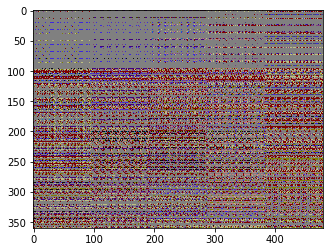

In [0]:
import matplotlib.pyplot as plt
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

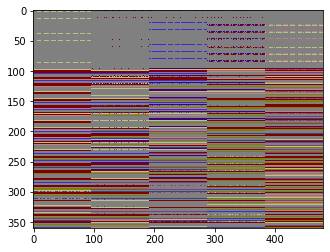

In [0]:
import matplotlib.pyplot as plt
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

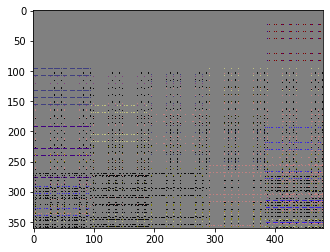

In [0]:
import matplotlib.pyplot as plt
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

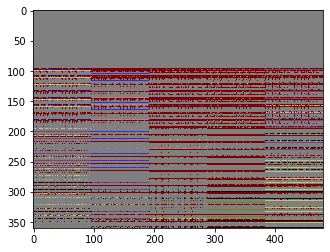

In [0]:
import matplotlib.pyplot as plt
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

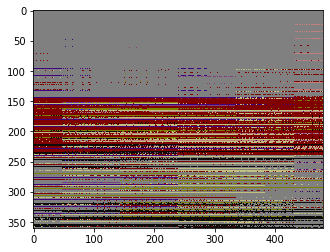

In [0]:
import matplotlib.pyplot as plt
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

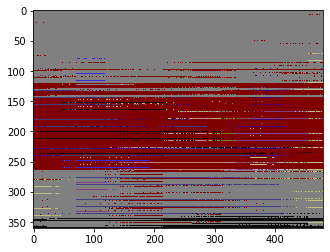

In [0]:
import matplotlib.pyplot as plt
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

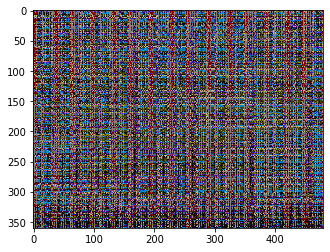

In [0]:
import matplotlib.pyplot as plt
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

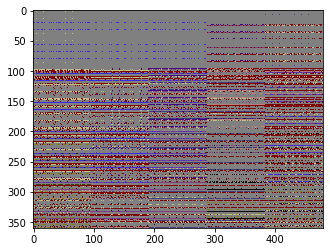

In [0]:
import matplotlib.pyplot as plt
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

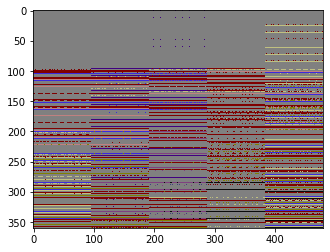

In [0]:
import matplotlib.pyplot as plt
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

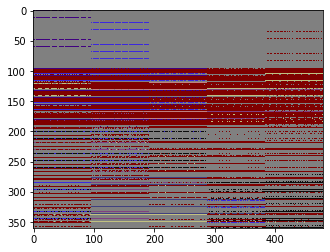

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

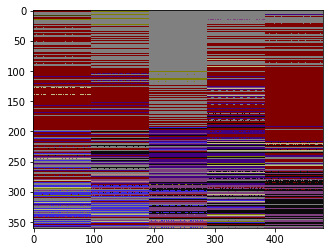

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

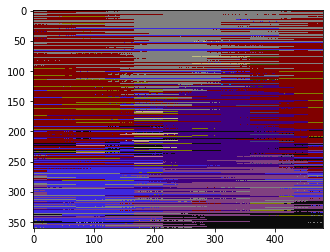

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

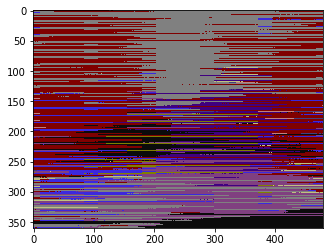

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

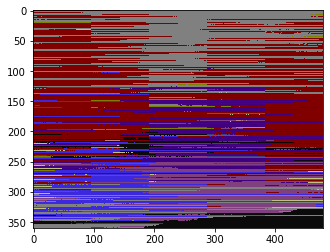

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

In [0]:
import os

In [0]:
def binarylab(labels):
    x = np.zeros([360,480,3])    
    for i in range(360):
        for j in range(480):
            x[i,j,labels[i][j]]=1
    return x


train_data = []
for filename in tqdm(os.listdir('/content/drive/My Drive/data_set/train_data/train set/')):
    img = cv2.imread('/content/drive/My Drive/data_set/train_data/train set/' +filename)
    resized = cv2.resize(img,dim) 
    train_data.append(resized)


train_label = []
for filename in tqdm(os.listdir('/content/drive/My Drive/ann/')):
    img = cv2.imread('/content/drive/My Drive/ann/' +filename)
    resized = cv2.resize(img,dim)
    image = binarylab(resized) 
    train_label.append(image)

train_data = np.asarray(train_data)
train_label = np.asarray(train_label)


100%|██████████| 390/390 [02:52<00:00,  2.10it/s]

100%|██████████| 390/390 [03:42<00:00,  1.71it/s]


In [0]:
train_label = np.reshape(train_label,(390,360*480,3))

In [0]:
model = models.Sequential()
model.add(ZeroPadding2D(padding=(pad,pad) ,input_shape =(360,480,3)))


model.add(Conv2D(filter_size, kernel, kernel, border_mode='valid', activation='relu' ))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Conv2D(filter_size, kernel, kernel, border_mode='same', activation='relu' ))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(filter_size, kernel, kernel, border_mode='same', activation='relu' ))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))


model.add(Conv2D(filter_size, kernel, kernel, border_mode='same', activation='relu' ))
model.add(UpSampling2D(size=(pool_size,pool_size)))



model.add(Conv2D(filter_size, kernel, kernel, border_mode='same', activation='relu' ))


model.add(UpSampling2D(size=(pool_size,pool_size)))


model.add(Conv2D(filter_size, kernel, kernel, border_mode='same', activation='relu' ))
model.add(UpSampling2D(size=(pool_size,pool_size)))

model.add(Layer(input_shape=(360, 480,3)))


model.add(Conv2D(filter_size, kernel, kernel, border_mode='same', activation='relu' ))
model.add(Conv2D(3, 1, 1, border_mode='valid'))


model.add(Reshape((3,data_shape)))
model.add(Permute((2, 1)))


model.add(Activation('softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_9 (ZeroPaddin (None, 362, 482, 3)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 360, 480, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 180, 240, 32)      0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 180, 240, 32)      9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 90, 120, 32)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 90, 120, 32)       9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 45, 60, 32)       

In [0]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, train_label,batch_size=5, epochs=20)

Epoch 1/20
390/390 [==============================] - 5s 13ms/step - loss: 0.9121 - acc: 0.5418
Epoch 2/20
390/390 [==============================] - 4s 11ms/step - loss: 0.8313 - acc: 0.6123
Epoch 3/20
390/390 [==============================] - 4s 11ms/step - loss: 0.7998 - acc: 0.6462
Epoch 4/20
390/390 [==============================] - 4s 11ms/step - loss: 0.7823 - acc: 0.6611
Epoch 5/20
390/390 [==============================] - 4s 11ms/step - loss: 0.7686 - acc: 0.6762
Epoch 6/20
390/390 [==============================] - 4s 11ms/step - loss: 0.7476 - acc: 0.6917
Epoch 7/20
390/390 [==============================] - 4s 11ms/step - loss: 0.7286 - acc: 0.7069
Epoch 8/20
390/390 [==============================] - 4s 11ms/step - loss: 0.7054 - acc: 0.7234
Epoch 9/20
390/390 [==============================] - 4s 11ms/step - loss: 0.6978 - acc: 0.7294
Epoch 10/20
390/390 [==============================] - 4s 11ms/step - loss: 0.6702 - acc: 0.7469
Epoch 11/20
390/390 [==================

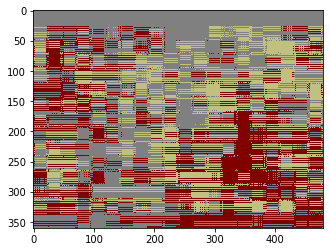

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

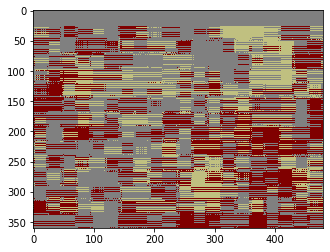

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

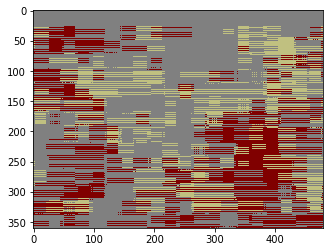

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

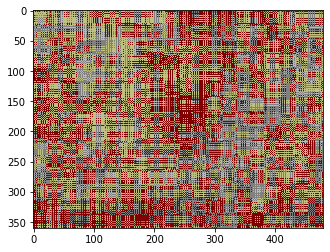

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

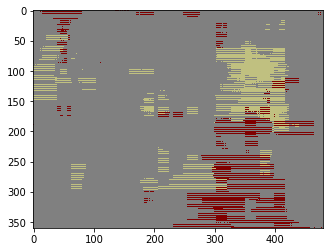

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

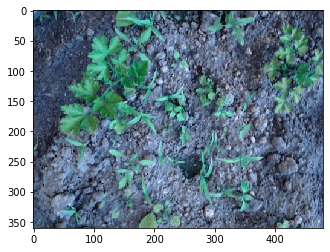

In [0]:
plt.imshow(train_data[0])

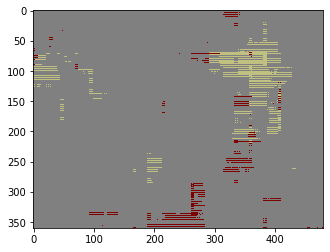

In [0]:
output = model.predict_proba(train_data[0:2])
pred = visualize(np.argmax(output[0],axis=1).reshape((360,480)), False)
plt.imshow(pred)

In [0]:
#weed

In [0]:
from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
import itertools
import numpy as np
import theano.tensor as T
np.random.seed(1337) # for reproducibility
from keras.datasets import mnist
from keras.layers.noise import GaussianNoise
import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import keras.regularizers 

from keras import backend as K

import cv2
import numpy as np

path = '/content/drive/My Drive/CamVid/'
data_shape = 360*480

Using TensorFlow backend.


In [0]:
def normalized(rgb):
    #return rgb/255.0
    norm=np.zeros((rgb.shape[0], rgb.shape[1], 3),np.float32)

    b=rgb[:,:,0]
    g=rgb[:,:,1]
    r=rgb[:,:,2]

    norm[:,:,0]=cv2.equalizeHist(b)
    norm[:,:,1]=cv2.equalizeHist(g)
    norm[:,:,2]=cv2.equalizeHist(r)

    return norm

def binarylab(labels):
    x = np.zeros([360,480,12])    
    for i in range(360):
        for j in range(480):
            x[i,j,labels[i][j]]=1
    return x

In [0]:
def prep_data():
    train_data = []
    train_label = []
    for i in range(len(txt)):
        ## these paths are very specific to my machine
        train_data.append(np.rollaxis(normalized(cv2.imread(os.getcwd() + txt[i][0][7:])),2))
        train_label.append(binarylab(cv2.imread(os.getcwd() + txt[i][1][7:][:-1])[:,:,0]))
        print('.',end='')
    return np.array(train_data), np.array(train_label)

train_data, train_label = prep_data()
train_label = np.reshape(train_label,(367,data_shape,12))

In [0]:
import os

In [0]:
os.get